In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
url_csv = {
   "candies_factories": "https://drive.google.com/uc?export=download&id=1KgboJ9kQ90uTUjLEo7yFqdj23agK0NVa",
   "candy_products": "https://drive.google.com/uc?export=download&id=1IxRIPCJFj1cufkjQw2K3K-D07B6lkauR",
   "customers": "https://drive.google.com/uc?export=download&id=1sw3x4c6ki20eMuf7mGVLJRSn63G6lCDT",
   "sales_ca": "https://drive.google.com/uc?export=download&id=18SYEbr8X21DmYXQAi2eMU3O-u0e6e-Mc",
   "sales_us": "https://drive.google.com/uc?export=download&id=1c_b5frSJjmV1gBJN-9LfhZtXyKeHfHQ2",}
candy_factory = pd.read_csv(url_csv['candies_factories'])
candy_products = pd.read_csv(url_csv['candy_products'])
sales_ca = pd.read_csv(url_csv['sales_ca'])
sales_us = pd.read_csv(url_csv['sales_us'])
customers = pd.read_csv(url_csv['customers'])
url = "https://drive.google.com/uc?export=download&id=1wvw--W5gwcYc3E3h2oTdGXi8uMS0qRoZ"
candy_targets = pd.read_json(url)

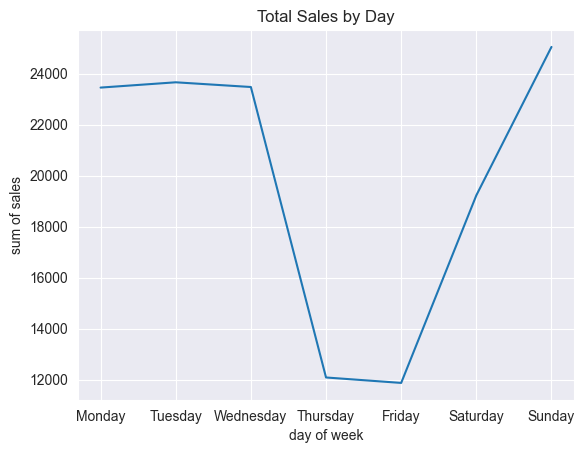

In [3]:
sales_us['Order Date'] = pd.to_datetime(sales_us['Order Date'])

sales_us['Day_Num'] = sales_us['Order Date'].dt.dayofweek 
sales_us['Day_Name'] = sales_us['Order Date'].dt.day_name()

weekly_summary = sales_us.groupby(['Day_Num', 'Day_Name'])['Sales'].sum().reset_index()

plt.plot(weekly_summary['Day_Name'], weekly_summary['Sales'])

plt.title('Total Sales by Day')
plt.xlabel('day of week')
plt.ylabel('sum of sales')
plt.grid(True)
plt.show()

# איזה יום בשבוע היה יום השיא במכירות? ראשון
# האם יש מגמה עולה או יורדת לאורך השבוע? יורדת ואז עולה בסופש


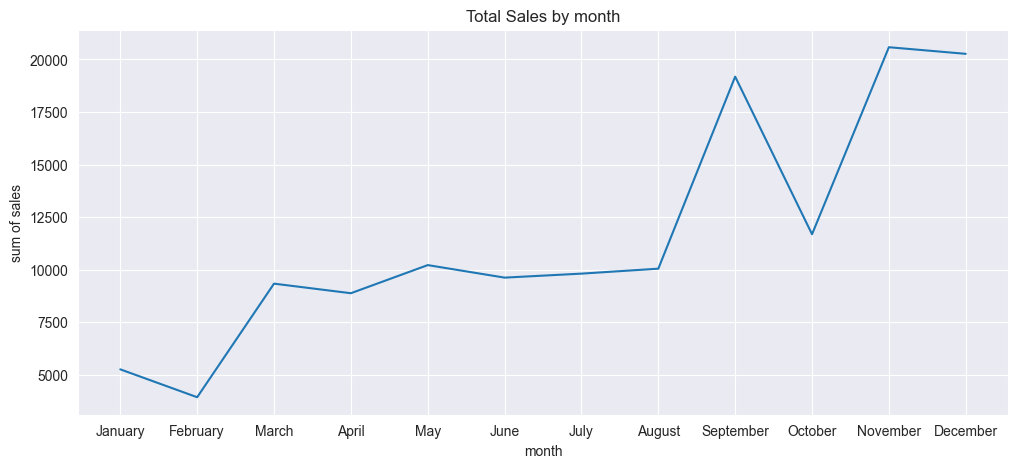

In [4]:
sales_us['Order Date'] = pd.to_datetime(sales_us['Order Date'])

sales_us['month'] = sales_us['Order Date'].dt.month 
sales_us['month_Name'] = sales_us['Order Date'].dt.month_name()

monthly_summary = sales_us.groupby(['month', 'month_Name'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 5))
plt.plot(monthly_summary['month_Name'], monthly_summary['Sales'])

plt.title('Total Sales by month')
plt.xlabel('month')
plt.ylabel('sum of sales')
plt.grid(True)

plt.show()

# באיזה חודש היו המכירות הגבוהות ביותר? נובמבר
# האם יש מגמה עונתית או עלייה מתמדת במכירות? מגמה עונתית


<BarContainer object of 15 artists>

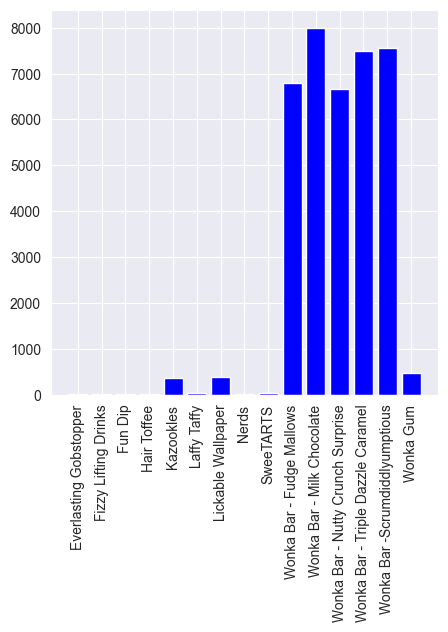

In [5]:
sales_us.columns = sales_us.columns.str.replace(' ','_')
sales_us.columns = sales_us.columns.str.lower()
units_per_pro = sales_us.groupby(['product_name'])['units'].sum().reset_index()
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
plt.bar(units_per_pro['product_name'],units_per_pro['units'],color = 'b')

# איזה מוצר נמצא במלאי הגדול ביותר? wonka bar milk choclate


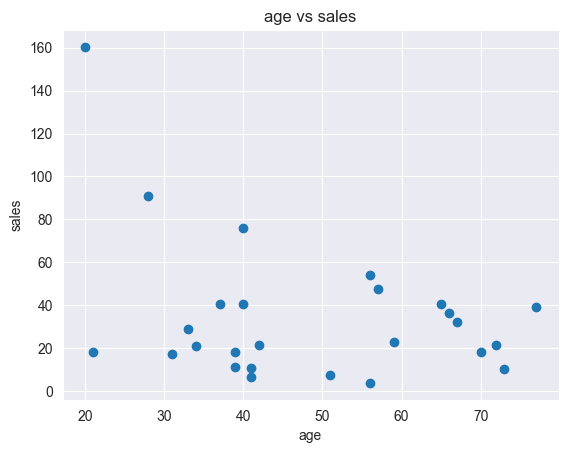

In [6]:
total_sales = sales_us.groupby(['customer_id'])['sales'].sum().reset_index()
customers_sales = customers.merge(total_sales, on = 'customer_id')
plt.scatter(customers_sales['age'],customers_sales['sales'])
plt.title('age vs sales')
plt.xlabel('age')
plt.ylabel('sales')
plt.show()

# האם קיימת מגמה ברורה בין גיל הלקוח לבין הסכום שהוא מוציא? נראה שככל שהלקוח צעיר יותר כך הוא מוציא יותר


Text(0.5, 1.0, '')

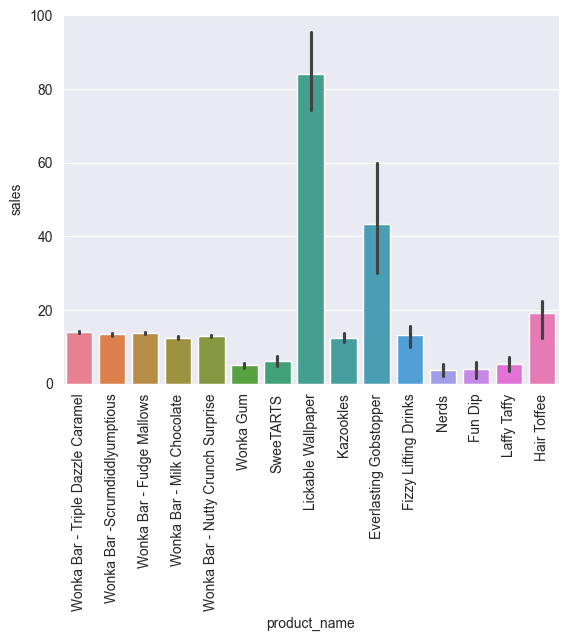

In [7]:
plt.xticks(rotation = 90)
sns.barplot(x="product_name", y="sales",hue='product_name' ,data=sales_us)
plt.title('')

# איזה מוצר נמכר הכי הרבה? lickable wallpaper
# האם יש מוצר שחייבים להגדיל את המלאי שלו? lickable wallpaper נראה הוא המוצר הכי נמכר אך הטבלה הקודמת ניתן לראות שהמלאי נמוך


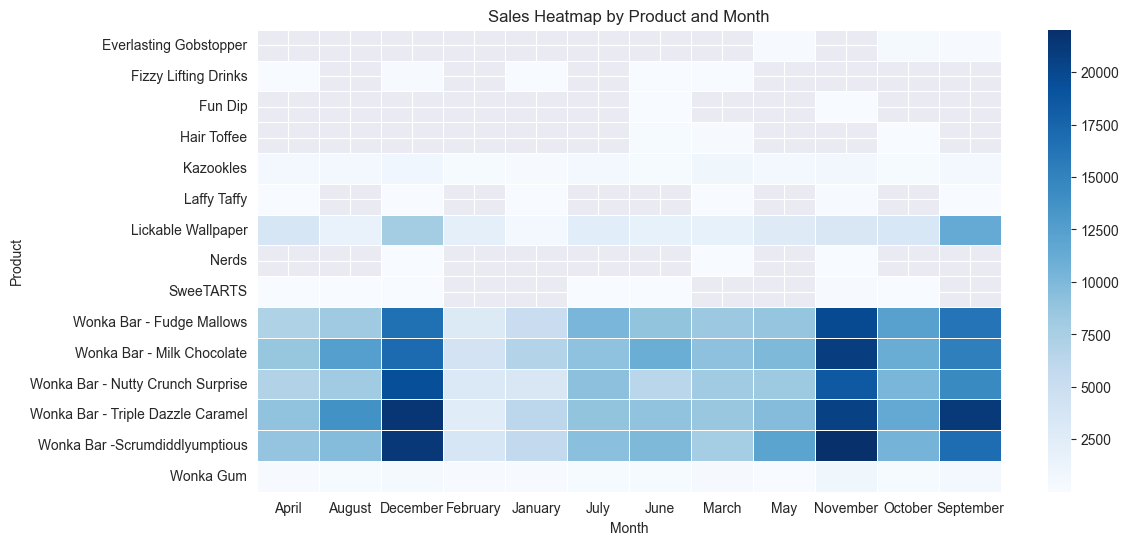

In [21]:
sales_us["order_date"] = pd.to_datetime(sales_us["order_date"])
sales_us["month"] = sales_us["order_date"].dt.month_name()
sales_us['total_sales'] = sales_us["sales"]*sales_us["units"]


sales_pivot = (sales_us.groupby(["product_name", "month"])["total_sales"].sum()
.reset_index().pivot(
index="product_name",
columns="month",
values="total_sales"))


plt.figure(figsize=(12, 6))
sns.heatmap(sales_pivot,cmap="Blues",linewidths=0.5)

plt.title("Sales Heatmap by Product and Month")
plt.xlabel("Month")
plt.ylabel("Product")
plt.show()



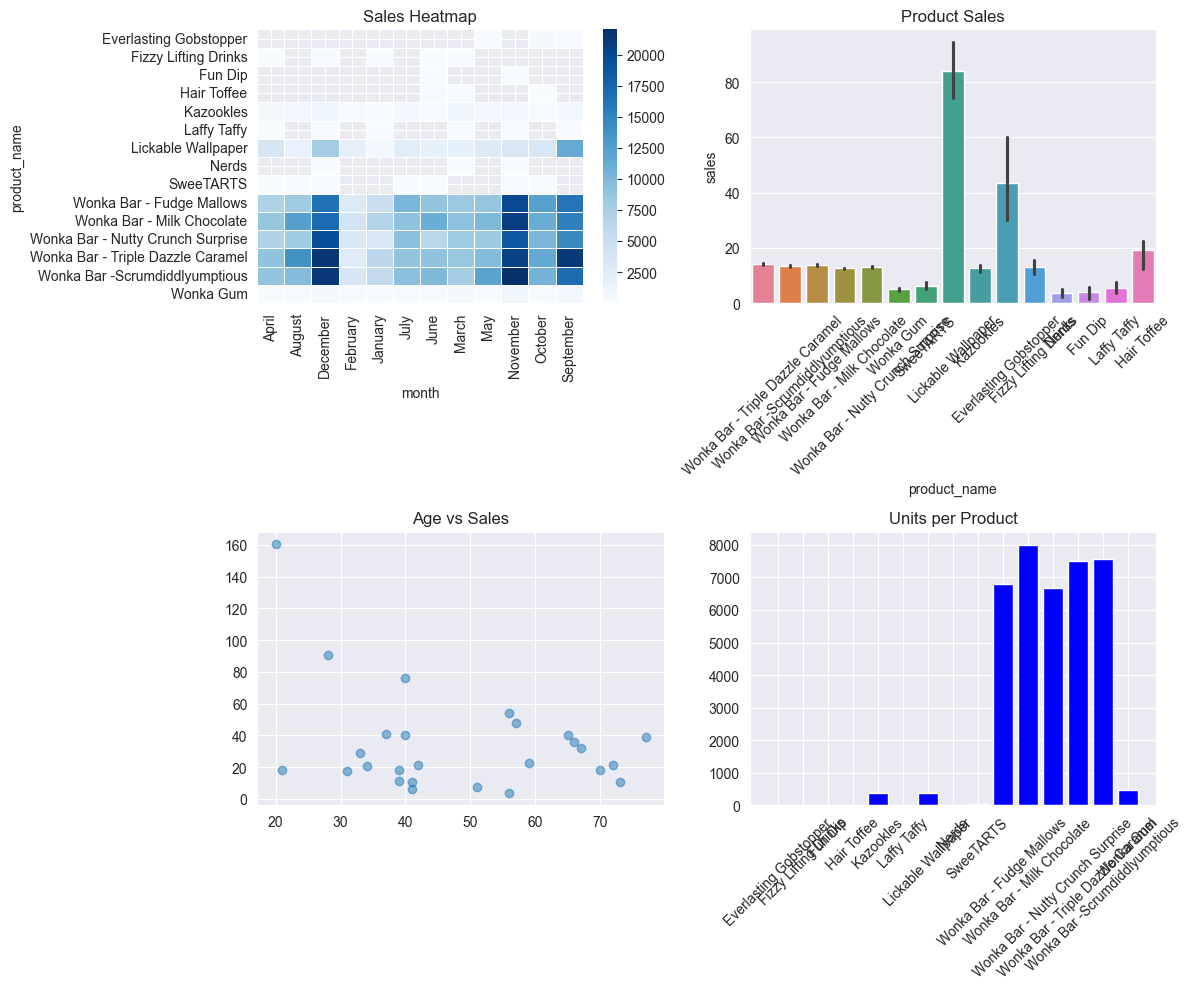

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))


sns.heatmap(sales_pivot, cmap="Blues", linewidths=0.5, ax=axes[0, 0])
axes[0, 0].set_title('Sales Heatmap')

sns.barplot(x="product_name", y="sales", hue='product_name', data=sales_us, ax=axes[0, 1])
axes[0, 1].set_title('Product Sales')
axes[0, 1].tick_params(axis='x', rotation=45)

axes[1, 0].scatter(customers_sales['age'], customers_sales['sales'], alpha=0.5)
axes[1, 0].set_title('Age vs Sales')

axes[1, 1].bar(units_per_pro['product_name'], units_per_pro['units'], color='b')
axes[1, 1].set_title('Units per Product')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()


plt.savefig('my_dashboard.png', dpi=300, bbox_inches='tight')


plt.savefig('my_dashboard.pdf', bbox_inches='tight')


plt.show()